# Interpolate coordinates from sample structure

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# import plotly.graph_objects as go

Let's look at a sample structure that is ready to go

In [2]:
out_dir = '/home/ariana/data/distance_mats/hic/'

In [46]:
# def show_conform(fileName, sampleNum):
#     C_normalized = np.loadtxt(demo_result_path+"C_normalized.txt")
#     beadsNum = C_normalized.shape[0]

#     lines = open(fileName).readlines()
#     start = sampleNum * (beadsNum + 2) + 2
#     end = (sampleNum + 1) * (beadsNum + 2)

#     lines = lines[start:end]
#     x = []
#     y = []
#     z = []
#     for line in lines:
#         split = line.split("\t")
#         x.append(float(split[1]))
#         y.append(float(split[2]))
#         z.append(float(split[3].replace("\n", "")))
    
#     # fig = go.Figure(data = go.Scatter3d(x = x, y = y, z = z,
#     #                                     marker = dict(size = 8, color = np.array(range(beadsNum)),
#     #                                                   # colorscale = 'Picnic',
#     #                                                   colorscale = 'RdBu',
#     #                                                   opacity = 0.6),
#     #                                     line = dict(width = 5, color = 'lime')))
    
#     # fig.update_layout(font_size = 10, hoverlabel_font_size = 10)
#     # fig.show()
#     return x, y, z, beadsNum

In [47]:
# demo_result_path = '/home/ariana/software/PHi-C2/demo/Bonev_mESCs_observed_KR_chr8_42100000-44525000_res25000bp/'
# sample_number =  123#@param {type:"integer"}
# x, y, z, beadsNum = show_conform(demo_result_path+"data_sampling/conformations.xyz", sample_number)

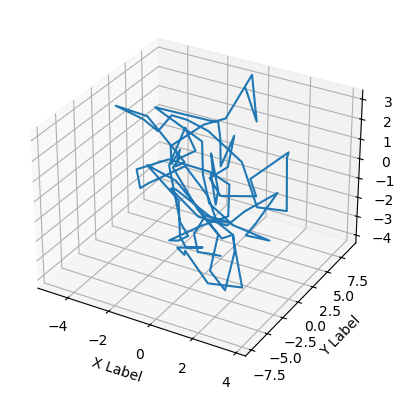

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# # Create a 3D scatter plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot(x, y, z)

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# plt.show()

I now have sample coordinates of length = beadsNum. Now I want to interpolate 1,000 positions along this polymer

In [3]:
from scipy import interpolate

def interpolate_struct(x_sim, y_sim, z_sim, n_points):
    # x_sim, y_sim, z_sim = V[:,0], V[:,1], V[:,2]
    tck, u = interpolate.splprep(x=[x_sim,y_sim,z_sim], s=2)
    u_fine = np.linspace(0,1,n_points)
    x_fine, y_fine, z_fine = interpolate.splev(u_fine, tck)
    V_interpol = np.vstack((x_fine,y_fine,z_fine)).T
    return V_interpol

def interpolate_struct_from3d(V, n_points):
    x_sim, y_sim, z_sim = V[:,0], V[:,1], V[:,2]
    tck, u = interpolate.splprep(x=[x_sim,y_sim,z_sim], s=1)
    u_fine = np.linspace(0,1,n_points)
    x_fine, y_fine, z_fine = interpolate.splev(u_fine, tck)
    V_interpol = np.vstack((x_fine,y_fine,z_fine)).T
    return V_interpol

In [74]:
B = 1000
interpolated_coords = interpolate_struct(x,y,z,n_points=B)

In [75]:
np.shape(interpolated_coords)

(1000, 3)

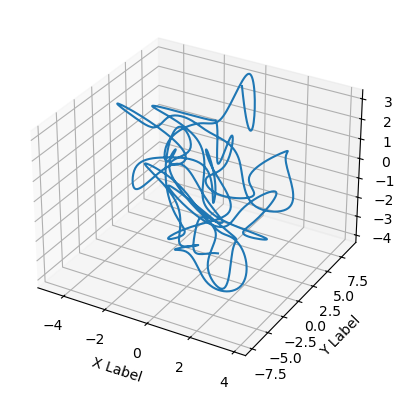

In [76]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(interpolated_coords[:,0], interpolated_coords[:,1], interpolated_coords[:,2])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [12]:
from scipy.spatial import distance_matrix


In [54]:
# Compute the Euclidean distance matrix between the two sets of points
distance_mat = distance_matrix(interpolated_coords, interpolated_coords)
distance_mat

array([[ 0.        ,  0.57307903,  1.07233067, ..., 16.66852218,
        16.79271524, 16.88964365],
       [ 0.57307903,  0.        ,  0.49929563, ..., 16.15619676,
        16.28131602, 16.37869978],
       [ 1.07233067,  0.49929563,  0.        , ..., 15.71086035,
        15.83671847, 15.93441926],
       ...,
       [16.66852218, 16.15619676, 15.71086035, ...,  0.        ,
         0.20873639,  0.3988671 ],
       [16.79271524, 16.28131602, 15.83671847, ...,  0.20873639,
         0.        ,  0.19229715],
       [16.88964365, 16.37869978, 15.93441926, ...,  0.3988671 ,
         0.19229715,  0.        ]])

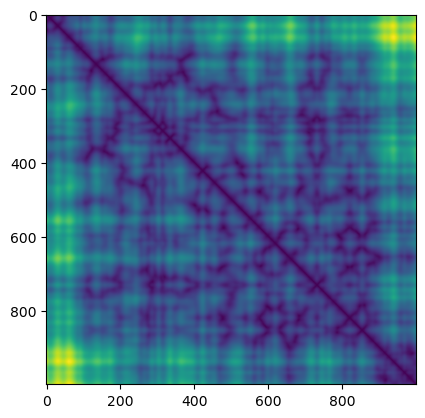

In [55]:
plt.imshow(distance_mat)

# Now let's do it with the real structures

In [56]:
dimes_data_path = '/home/data/region_of_interest/DIMES_108/GM1287.xyz'

In [147]:
def read_xyz_file_to_numpy(file_path):
    """
    Reads an .xyz file and returns a 3D numpy array of the coordinates.

    :param file_path: Path to the .xyz file.
    :return: A 3D numpy array where each row is [x, y, z] for a point.
    """
    coordinates = []  # List to hold coordinates
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            # Ensure the line has exactly 4 parts: an element and three coordinates
            if len(parts) == 4:
                try:
                    # Extract and store only the coordinates, convert them to floats
                    coord = list(map(float, parts[1:]))
                    coordinates.append(coord)
                except ValueError:
                    # Handle the case where conversion to float fails
                    print(f"Skipping line due to invalid coordinates: {line}")
            else:
                # Skip lines that don't match the expected format
                print(f"Skipping invalid or empty line: {line}")
    
    # Convert the list of coordinates to a 3D numpy array
    coordinates_array = np.array(coordinates)
    return coordinates_array

# Example usage
# file_path = 'path/to/your/file.xyz'  # Replace this with the actual file path
coordinates_array = read_xyz_file_to_numpy(dimes_data_path)
print(coordinates_array)


Skipping invalid or empty line: 108

Skipping invalid or empty line: 

Skipping invalid or empty line: 108

Skipping invalid or empty line: 

Skipping invalid or empty line: 108

Skipping invalid or empty line: 

Skipping invalid or empty line: 108

Skipping invalid or empty line: 

Skipping invalid or empty line: 108

Skipping invalid or empty line: 

Skipping invalid or empty line: 108

Skipping invalid or empty line: 

Skipping invalid or empty line: 108

Skipping invalid or empty line: 

Skipping invalid or empty line: 108

Skipping invalid or empty line: 

Skipping invalid or empty line: 108

Skipping invalid or empty line: 

Skipping invalid or empty line: 108

Skipping invalid or empty line: 

Skipping invalid or empty line: 108

Skipping invalid or empty line: 

Skipping invalid or empty line: 108

Skipping invalid or empty line: 

Skipping invalid or empty line: 108

Skipping invalid or empty line: 

Skipping invalid or empty line: 108

Skipping invalid or empty line: 

Skippi

In [148]:
num_dimes_beads = 108
coords_by_snapshot = coordinates_array.reshape((1000, num_dimes_beads, 3))

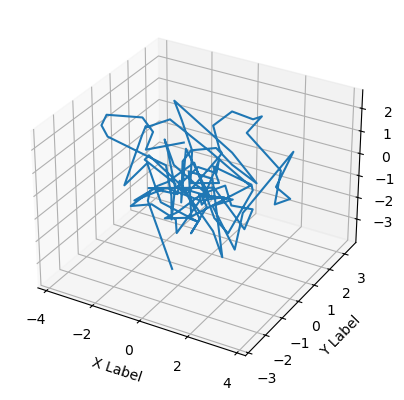

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(coords_by_snapshot[0][:,0], coords_by_snapshot[0][:,1], coords_by_snapshot[0][:,2])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

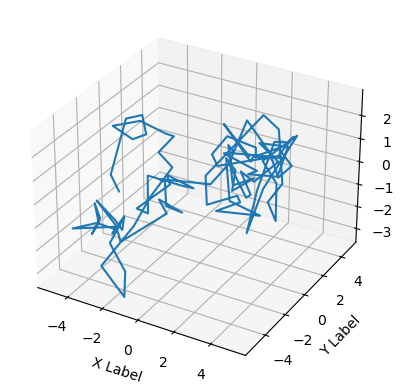

In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
idx = 4
ax.plot(coords_by_snapshot[idx][:,0], coords_by_snapshot[idx][:,1], coords_by_snapshot[idx][:,2])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [61]:
#sanity check that reshape works as expected
# num_dimes_beads = 1071
print(np.sum(coords_by_snapshot[0]!=coordinates_array[:num_dimes_beads]))
print(np.sum(coords_by_snapshot[-1]!=coordinates_array[-num_dimes_beads:]))
for test_idx in [5, 50, 500, 750]:
    print(np.sum(coords_by_snapshot[test_idx]!=coordinates_array[test_idx*num_dimes_beads:(test_idx+1)*num_dimes_beads]))

0
0
0
0
0
0


# Now I can create a distance matrix for one set of coordinates

0


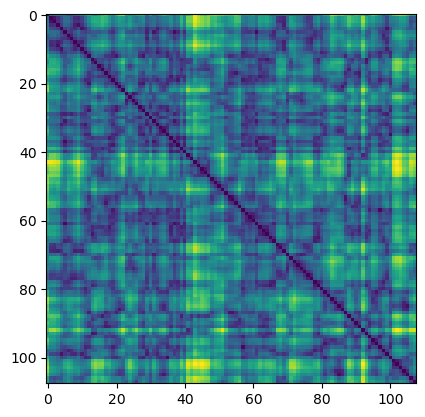

1


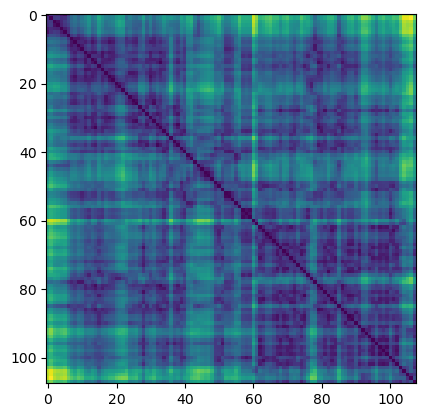

2


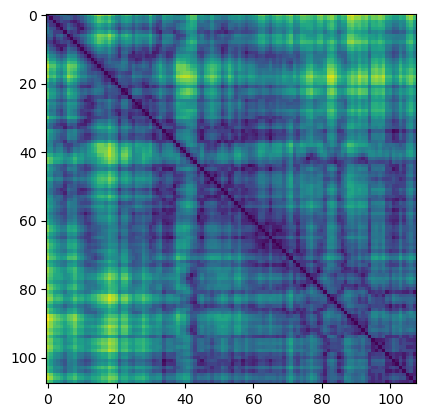

3


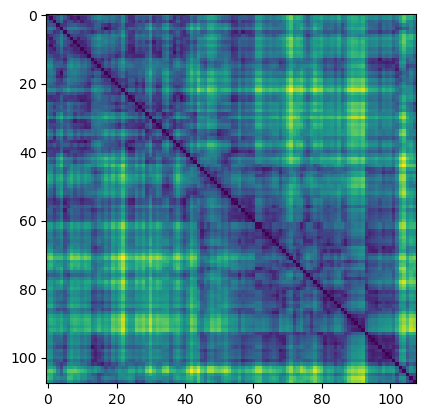

4


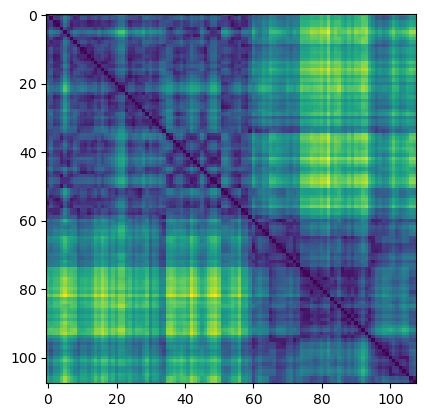

In [62]:
num_snaps_to_avg = 5# len(coords_by_snapshot)
for idx in range(0,num_snaps_to_avg):
    print(idx)
    all_snaps = []
    snapshot = distance_matrix(coords_by_snapshot[idx], coords_by_snapshot[idx])
    all_snaps.append(snapshot)
    plt.imshow(snapshot)
    plt.show()

In [63]:
num_snaps_to_avg = len(coords_by_snapshot)
all_snaps = np.array([distance_matrix(coords_by_snapshot[idx], coords_by_snapshot[idx]) for idx in range(num_snaps_to_avg)])

(108, 108)


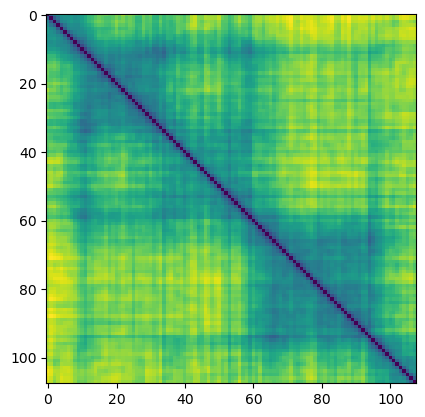

In [64]:
avg_dist_mat = np.mean(all_snaps, axis = 0)
plt.imshow(avg_dist_mat)
print(np.shape(avg_dist_mat))
plt.show()

Now redo with the interpolated coordinates

In [77]:
spline_transfored_coords = [interpolate_struct_from3d(coords_by_snapshot[idx], B) for idx in range(len(coords_by_snapshot))]
spline_transfored_dist_mat = np.array([distance_matrix(spline_transfored_coords[idx], spline_transfored_coords[idx]) for idx in range(len(coords_by_snapshot))])

In [78]:
np.shape(np.mean(spline_transfored_dist_mat, axis = 0))

(1000, 1000)

In [79]:
# The average distance matrix of the spline interpolated data should not look very different from the raw distance matrix
average_spline_transformed_data = np.mean(spline_transfored_dist_mat, axis = 0)

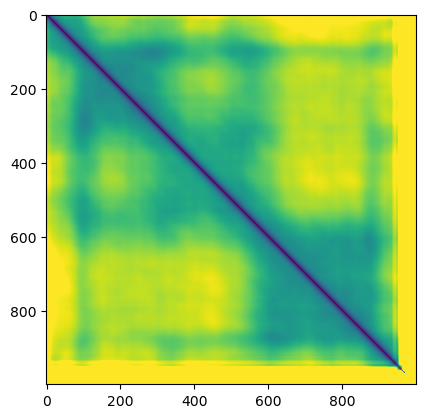

In [80]:
plt.imshow(average_spline_transformed_data, vmax = 5)

# The problem seems to be with the spline interpolation at the ends

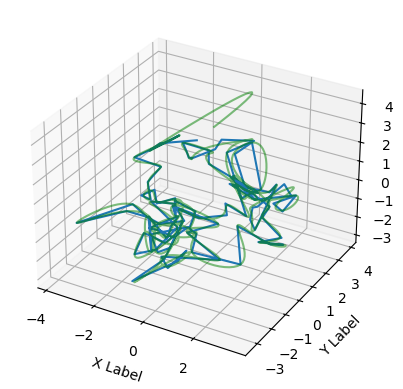

In [82]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
idx = 7
ax.plot(coords_by_snapshot[idx][:,0], coords_by_snapshot[idx][:,1], coords_by_snapshot[idx][:,2])
problematic_number = -1#-17
ax.plot(spline_transfored_coords[idx][:,0][:problematic_number], spline_transfored_coords[idx][:,1][:problematic_number], spline_transfored_coords[idx][:,2][:problematic_number], color = 'g', alpha = 0.5)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [4]:
def interpolate_linear_from3d(V, n_points):
    # Extract x, y, z coordinates
    x_sim, y_sim, z_sim = V[:, 0], V[:, 1], V[:, 2]
    
    # Generate a linear space for the parameter 't' based on the number of points in 'V'
    t = np.linspace(0, 1, len(V))
    
    # Generate a new linear space for 't', now based on 'n_points'
    t_fine = np.linspace(0, 1, n_points)
    
    # Linearly interpolate for each dimension
    x_fine = np.interp(t_fine, t, x_sim)
    y_fine = np.interp(t_fine, t, y_sim)
    z_fine = np.interp(t_fine, t, z_sim)
    
    # Combine the interpolated values into a single array
    V_interpol = np.vstack((x_fine, y_fine, z_fine)).T
    
    return V_interpol

In [85]:
V_interpol = interpolate_linear_from3d(coords_by_snapshot[idx], 1000)
V_interpol

array([[-0.36713373, -0.86482081, -0.94640731],
       [-0.43932651, -0.84076467, -1.05093599],
       [-0.51151929, -0.81670854, -1.15546467],
       ...,
       [-1.83114157,  2.36746743,  1.2605744 ],
       [-1.83088081,  2.63520914,  1.10974662],
       [-1.83062004,  2.90295086,  0.95891883]])

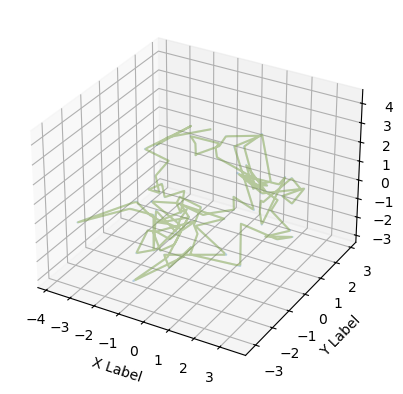

In [97]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
idx = 7
ax.plot(coords_by_snapshot[idx][:,0], coords_by_snapshot[idx][:,1], coords_by_snapshot[idx][:,2], alpha = 0.3)
# problematic_number = -1#-17
ax.plot(V_interpol[:,0], V_interpol[:,1], V_interpol[:,2], color = 'y', alpha = 0.3)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [98]:
np.shape(V_interpol[:,0])

(1000,)

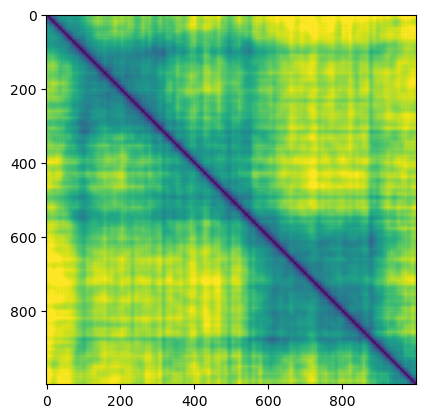

In [101]:
lin_transformed_coords = [interpolate_linear_from3d(coords_by_snapshot[idx], B) for idx in range(len(coords_by_snapshot))]
lin_transformed_dist_mat = np.array([distance_matrix(lin_transformed_coords[idx], lin_transformed_coords[idx]) for idx in range(len(coords_by_snapshot))])

average_lin_transformed_data = np.mean(lin_transformed_dist_mat, axis = 0)

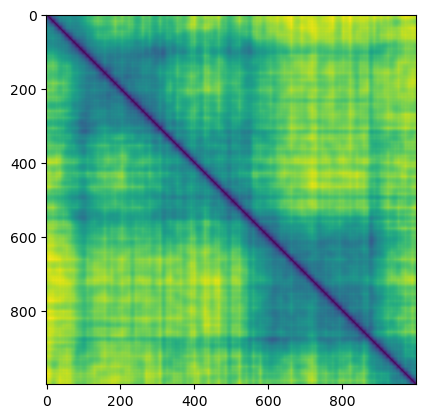

In [105]:
plt.imshow(average_lin_transformed_data)#, vmax = 5)
plt.show()

In [107]:
np.save(out_dir+'dimes_dist_mat.npy', average_lin_transformed_data, allow_pickle=True, fix_imports=True)

# Now need to use with other data

In [108]:
phic_path = '/home/data/region_of_interest/PHiC2_HiC/data_dynamics/sample0.xyz'

In [109]:
phic_coords = read_xyz_file_to_numpy(phic_path)

Skipping invalid or empty line: 214

Skipping invalid or empty line: frame = 0

Skipping invalid or empty line: 214

Skipping invalid or empty line: frame = 1

Skipping invalid or empty line: 214

Skipping invalid or empty line: frame = 2

Skipping invalid or empty line: 214

Skipping invalid or empty line: frame = 3

Skipping invalid or empty line: 214

Skipping invalid or empty line: frame = 4

Skipping invalid or empty line: 214

Skipping invalid or empty line: frame = 5

Skipping invalid or empty line: 214

Skipping invalid or empty line: frame = 6

Skipping invalid or empty line: 214

Skipping invalid or empty line: frame = 7

Skipping invalid or empty line: 214

Skipping invalid or empty line: frame = 8

Skipping invalid or empty line: 214

Skipping invalid or empty line: frame = 9

Skipping invalid or empty line: 214

Skipping invalid or empty line: frame = 10

Skipping invalid or empty line: 214

Skipping invalid or empty line: frame = 11

Skipping invalid or empty line: 214

S

In [124]:
num_phic_beads = int(np.shape(phic_coords)[0]/(B+1))

In [125]:
phic_coords_by_snapshot = phic_coords.reshape((B+1, num_phic_beads, 3))

In [127]:
np.shape(phic_coords_by_snapshot)

(1001, 214, 3)

In [137]:
def all_coords_to_avg_dist_mat(coords_by_snapshot, B):
    lin_transformed_coords = [interpolate_linear_from3d(coords_by_snapshot[idx], B) for idx in range(len(coords_by_snapshot))]
    lin_transformed_dist_mat = np.array([distance_matrix(lin_transformed_coords[idx], lin_transformed_coords[idx]) for idx in range(len(coords_by_snapshot))])
    average_lin_transformed_data = np.mean(lin_transformed_dist_mat, axis = 0)
    return average_lin_transformed_data

In [144]:
phic_214 = all_coords_to_avg_dist_mat(phic_coords_by_snapshot, B = 214)
phic_215 = all_coords_to_avg_dist_mat(phic_coords_by_snapshot, B = 215)

np.save(out_dir+'phic_dist_mat_214.npy', phic_214, allow_pickle=True, fix_imports=True)
np.save(out_dir+'phic_dist_mat_215.npy', phic_215, allow_pickle=True, fix_imports=True)

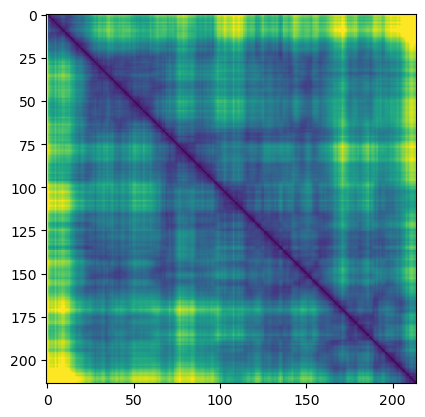

In [139]:
plt.imshow(tester, vmax = 15)
plt.show()

In [187]:
np.shape(tester)

(214, 214)

In [152]:
dimes_214 = all_coords_to_avg_dist_mat(coords_by_snapshot, B = 214)
dimes_215 = all_coords_to_avg_dist_mat(coords_by_snapshot, B = 215)

np.save(out_dir+'dimes_dist_mat_214.npy', dimes_214, allow_pickle=True, fix_imports=True)
np.save(out_dir+'dimes_dist_mat_215.npy', dimes_215, allow_pickle=True, fix_imports=True)

In [153]:
def get_coordinates_cif(file):
    '''
    It returns the corrdinate matrix V (N,3) of a .pdb file.
    The main problem of this function is that coordiantes are not always in 
    the same column position of a .pdb file. Do changes appropriatelly,
    in case that the data aren't stored correctly. 
    
    Input:
    file (str): the path of the .cif file.
    
    Output:
    V (np.array): the matrix of coordinates
    '''
    V = list()
    
    with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            if line.startswith("ATOM"):
                columns = line.split()
                x = eval(columns[10])
                y = eval(columns[11])
                z = eval(columns[12])
                V.append([x, y, z])
    
    return np.array(V)

In [180]:
loopsage_hic = '/home/data/region_of_interest/LoopSage_HiC.cif'

In [164]:
loopsage_hic_coords = get_coordinates_cif(loopsage_hic)

In [10]:
def all_coords_to_avg_dist_mat_1struct(coords_by_snapshot, B):
    lin_transformed_coords = interpolate_linear_from3d(coords_by_snapshot, B)
    lin_transformed_dist_mat = distance_matrix(lin_transformed_coords, lin_transformed_coords)
    # average_lin_transformed_data = np.mean(lin_transformed_dist_mat, axis = 0)
    return lin_transformed_dist_mat

In [170]:
loopsage_hic_coords_214 = all_coords_to_avg_dist_mat_1struct(loopsage_hic_coords, 214)
loopsage_hic_coords_215 = all_coords_to_avg_dist_mat_1struct(loopsage_hic_coords, 215)

np.save(out_dir+'loopsage_dist_mat_214.npy', loopsage_hic_coords_214, allow_pickle=True, fix_imports=True)
np.save(out_dir+'loopsage_dist_mat_215.npy', loopsage_hic_coords_215, allow_pickle=True, fix_imports=True)

In [173]:
multiem_fp_hic = '/home/blackpianocat/results/MultiEM/hakathon_HiC/MultiEM_afterMD.cif'

In [174]:
multiem_fp_hic_coords = get_coordinates_cif(multiem_fp_hic)

In [176]:
multiem_fp_hic_coords_214 = all_coords_to_avg_dist_mat_1struct(multiem_fp_hic_coords, 214)
multiem_fp_hic_coords_215 = all_coords_to_avg_dist_mat_1struct(multiem_fp_hic_coords, 215)
np.save(out_dir+'multiem_dist_mat_214.npy', multiem_fp_hic_coords_214, allow_pickle=True, fix_imports=True)
np.save(out_dir+'multiem_dist_mat_215.npy', multiem_fp_hic_coords_215, allow_pickle=True, fix_imports=True)

# Now for the ChiaPet Data

In [15]:
out_dir_chia = '/home/ariana/data/distance_mats/chia_pet/'

#### LoopSage

In [182]:
loopsage = '/home/data/region_of_interest/LoopSage_ChIA-PET.cif'
loopsage_chia_coords = get_coordinates_cif(loopsage_hic)

In [185]:
loopsage_chia_coords_214 = all_coords_to_avg_dist_mat_1struct(loopsage_chia_coords, 214)
loopsage_chia_coords_215 = all_coords_to_avg_dist_mat_1struct(loopsage_chia_coords, 215)

np.save(out_dir_chia+'loopsage_dist_mat_214.npy', loopsage_hic_coords_214, allow_pickle=True, fix_imports=True)
np.save(out_dir_chia+'loopsage_dist_mat_215.npy', loopsage_hic_coords_215, allow_pickle=True, fix_imports=True)

#### PHi-C

In [188]:
phic_chia = '/home/data/region_of_interest/PHiC2_ChIA-PET/data_dynamics/sample0.xyz'

In [194]:
phic_coords_chia = read_xyz_file_to_numpy(phic_chia)
B = 1000 # number of snaps represented in the data
num_phic_beads = int(np.shape(phic_coords_chia)[0]/(B+1))
phic_coords_chia_by_snapshot = phic_coords_chia.reshape((B+1, num_phic_beads, 3))

Skipping invalid or empty line: 214

Skipping invalid or empty line: frame = 0

Skipping invalid or empty line: 214

Skipping invalid or empty line: frame = 1

Skipping invalid or empty line: 214

Skipping invalid or empty line: frame = 2

Skipping invalid or empty line: 214

Skipping invalid or empty line: frame = 3

Skipping invalid or empty line: 214

Skipping invalid or empty line: frame = 4

Skipping invalid or empty line: 214

Skipping invalid or empty line: frame = 5

Skipping invalid or empty line: 214

Skipping invalid or empty line: frame = 6

Skipping invalid or empty line: 214

Skipping invalid or empty line: frame = 7

Skipping invalid or empty line: 214

Skipping invalid or empty line: frame = 8

Skipping invalid or empty line: 214

Skipping invalid or empty line: frame = 9

Skipping invalid or empty line: 214

Skipping invalid or empty line: frame = 10

Skipping invalid or empty line: 214

Skipping invalid or empty line: frame = 11

Skipping invalid or empty line: 214

S

In [196]:
phic_214_chia = all_coords_to_avg_dist_mat(phic_coords_chia_by_snapshot, B = 214)
phic_215_chia = all_coords_to_avg_dist_mat(phic_coords_chia_by_snapshot, B = 215)

np.save(out_dir_chia+'phic_dist_mat_214.npy', phic_214_chia, allow_pickle=True, fix_imports=True)
np.save(out_dir_chia+'phic_dist_mat_215.npy', phic_215_chia, allow_pickle=True, fix_imports=True)

##### Multi-EM

In [198]:
multiem_fp_chia = '/home/blackpianocat/results/MultiEM/hakathon_ChIAPET/MultiEM_afterMD.cif'

multiem_fp_chia_coords = get_coordinates_cif(multiem_fp_chia)

multiem_fp_chia_coords_214 = all_coords_to_avg_dist_mat_1struct(multiem_fp_chia_coords, 214)
multiem_fp_chia_coords_215 = all_coords_to_avg_dist_mat_1struct(multiem_fp_chia_coords, 215)
np.save(out_dir_chia+'multiem_dist_mat_214.npy', multiem_fp_chia_coords_214, allow_pickle=True, fix_imports=True)
np.save(out_dir_chia+'multiem_dist_mat_215.npy', multiem_fp_chia_coords_215, allow_pickle=True, fix_imports=True)

# MiChroM

In [6]:
microm_hic_path = '/home/blackpianocat/results/MiChroM/hakathon_HiC/Chromosome_0_block0.pdb'
microm_chia_path = '/home/blackpianocat/results/MiChroM/hakathon_ChIA-PET/Chromosome_0_block1000.pdb'

In [7]:
def get_coordinates_pdb(file):
    '''
    It returns the corrdinate matrix V (N,3) of a .pdb file.
    The main problem of this function is that coordiantes are not always in 
    the same column position of a .pdb file. Do changes appropriatelly,
    in case that the data aren't stored correctly. 
    
    Input:
    file (str): the path of the .pdb file.
    
    Output:
    V (np.array): the matrix of coordinates
    '''
    V = list()
    
    with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            if line.startswith("CONNECT") or line.startswith("END") or line.startswith("TER"):
                break
            if line.startswith("ATOM"): 
                x = float(line[31:38])
                y = float(line[39:46])
                z = float(line[47:54])
                V.append([x, y, z])
    
    return np.array(V)

In [8]:
michrom_hic_coords = get_coordinates_pdb(microm_hic_path)
michrom_chia_coords = get_coordinates_pdb(microm_chia_path)

In [16]:
michrom_chia_coords_214 = all_coords_to_avg_dist_mat_1struct(michrom_chia_coords, 214)
michrom_chia_coords_215 = all_coords_to_avg_dist_mat_1struct(michrom_chia_coords, 215)

np.save(out_dir_chia+'michrom_dist_mat_214.npy', michrom_chia_coords_214, allow_pickle=True, fix_imports=True)
np.save(out_dir_chia+'michrom_dist_mat_215.npy', michrom_chia_coords_215, allow_pickle=True, fix_imports=True)

In [222]:
# michrom_hic_coords_214 = all_coords_to_avg_dist_mat_1struct(michrom_hic_coords, 214)
# michrom_hic_coords_215 = all_coords_to_avg_dist_mat_1struct(michrom_hic_coords, 215)

# np.save(out_dir+'michrom_dist_mat_214.npy', michrom_hic_coords, allow_pickle=True, fix_imports=True)
# np.save(out_dir+'michrom_dist_mat_215.npy', michrom_hic_coords, allow_pickle=True, fix_imports=True)

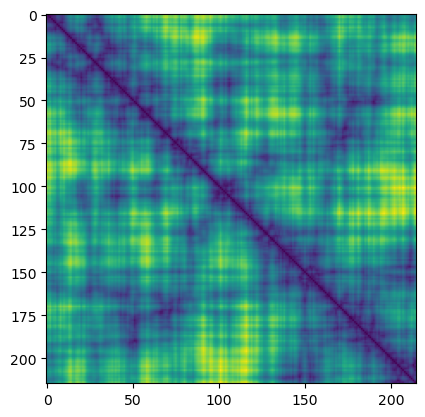

In [18]:
plt.imshow(michrom_chia_coords_215)